**Определим как распределены фильмы различных возрастных категорий по стриминговым сервисам и визуализируем эти данные**\
**Часть1 - Данные берем из CSV**\
**Часть2 - Данные берем из базы данных**

**part 1 - csv**

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загрузим данные из CSV файла с помощью pandas
data = pd.read_csv('MoviesOnStreamingPlatforms.csv')

# Очистка данных (меняем NaN на None)
data = data.where(pd.notnull(data), None)

In [3]:
# группируем данные по возрастной категории и платформе
grouped_data = data.groupby(['Age', 'Type']).agg({
    'Netflix': 'sum',
    'Hulu': 'sum',
    'Prime Video': 'sum',
    'Disney+': 'sum',
}).reset_index()

In [4]:
# создаем сводную таблицу с кол-вом фильмов для каждой стриминговой платформы и возрастной категории
pivot_table = pd.pivot_table(grouped_data, values=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], index='Age', columns='Type', aggfunc='sum', fill_value=0)

In [5]:
pivot_table

,Disney+,Hulu,Netflix,Prime Video
Type,0,0,0,0
Age,,,,
13+,70,175,404,397
16+,4,26,151,97
18+,3,383,877,1090
7+,278,98,322,421
all,370,36,144,160


<function matplotlib.pyplot.show(close=None, block=None)>

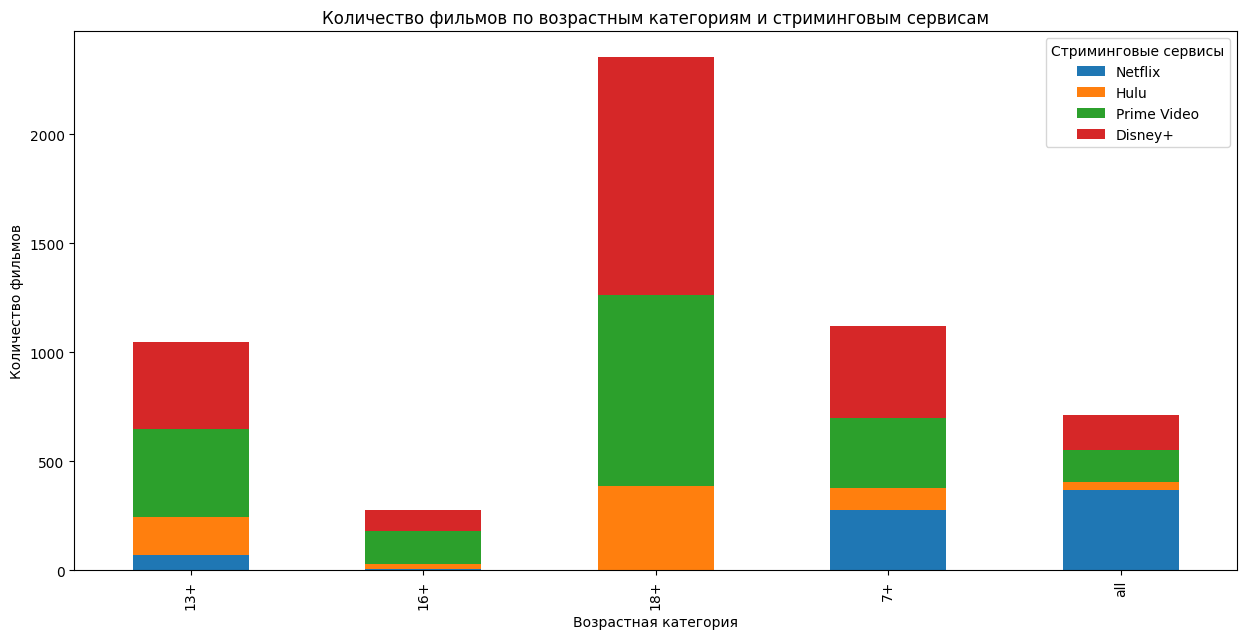

In [6]:
# визуализация

# создание диаграммы
pivot_table.plot(kind='bar', stacked=True, figsize=(15,7))

# метки осей и заголовок
plt.title('Количество фильмов по возрастным категориям и стриминговым сервисам')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество фильмов')
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'], title='Стриминговые сервисы')

plt.show

**Part 2 - SQL**

# Подключение к базе данных MySql

In [8]:
import pymysql

connection = pymysql.connect(
    host='localhost',
    user='root',
    password='YOUR PASS',
    database='movies'
)

# проверка подключения
if connection.open:
    print("Успешное подключение к БД")
else:
    print("Нет соединения с БД")

connection.close()

Успешное подключение к БД


In [9]:
# Создаем подключение к базе данных
connection = pymysql.connect(
    host="localhost",
    user='root',
    password='YOUR PASS',
    database='movies'
)

# Загружаем данные из файла CSV c помощью pandas
data = pd.read_csv('MoviesOnStreamingPlatforms.csv')

#############################################
# Очистка данных, замена значений Nan на None
data = data.where(pd.notnull(data), None)
#############################################

In [10]:
data

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,None,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,None,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,None,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,None,10/100,0,0,0,1,0


In [14]:
data.head(10)

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
5,5,6,To All the Boys I've Loved Before,2018,13+,94/100,1,0,0,0,0
6,6,7,The Social Dilemma,2020,13+,93/100,1,0,0,0,0
7,7,8,Okja,2017,13+,92/100,1,0,0,0,0
8,8,9,The Ballad of Buster Scruggs,2018,16+,92/100,1,0,0,0,0
9,9,10,The Trial of the Chicago 7,2020,18+,92/100,1,0,0,0,0


In [12]:
# Создадим список кортежей для множественной вставки
values = []
for index, row in data.iterrows():
    values.append((
        row["ID"], row["Title"], row['Year'], row["Age"], row["Rotten Tomatoes"],
        row['Netflix'], row['Hulu'], row['Prime Video'], row['Disney+'], row['Type']
    ))

In [15]:
# Создаем таблицу для данных из csv
with connection.cursor() as coursor:
    coursor.execute("""
        CREATE TABLE IF NOT EXISTS movies (
            id INT PRIMARY KEY,
            title VARCHAR(255),
            year INT,
            age VARCHAR(10),
            rotten_tomatoes VARCHAR(10),
            netflix BOOLEAN,
            hulu BOOLEAN,
            prime_video BOOLEAN,
            disney_plus BOOLEAN,
            type VARCHAR(255)
        )
    """)
    connection.commit()

In [ ]:
# Добавляем данные множественным INSERT
with connection.cursor() as coursor:
    query = """
        INSERT IGNORE INTO movies
            (id, title, year, age, rotten_tomatoes, netflix, hulu, prime_video, disney_plus, type) 
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    coursor.executemany(query, values)
    connection.commit()

In [17]:
# Сделаем выборку данных из таблицы `movies` и создадим DataFrame
query = """
    SELECT year, type, netflix, hulu, prime_video, disney_plus
    FROM movies
    WHERE type IS NOT NULL
"""

data_from_db= pd.read_sql(query, connection)

data_from_db

C:\Users\q10sn1k_\AppData\Local\Temp\ipykernel_2084\2182132640.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_from_db= pd.read_sql(query, connection)


,year,type,netflix,hulu,prime_video,disney_plus
0,2019,0,1,0,0,0
1,2016,0,1,0,0,0
2,2020,0,1,0,0,0
3,2001,0,1,0,0,0
4,2018,0,1,0,0,0
...,...,...,...,...,...,...
9510,2020,0,0,0,0,1
9511,2020,0,0,0,0,1
9512,2019,0,0,0,0,1
9513,2011,0,0,0,0,1


In [18]:
data_from_db.head(5)

,year,type,netflix,hulu,prime_video,disney_plus
0,2019,0,1,0,0,0
1,2016,0,1,0,0,0
2,2020,0,1,0,0,0
3,2001,0,1,0,0,0
4,2018,0,1,0,0,0


In [19]:
# очистка данных
data_from_db = data.where(pd.notnull(data), None)

In [21]:
# группируем данные по возрастной категории и платформе
grouped_data = data_from_db.groupby(['Age', 'Type']).agg({
    'Netflix': 'sum',
    'Hulu': 'sum',
    'Prime Video': 'sum',
    'Disney+': 'sum',
}).reset_index()

In [22]:
# создаем сводную таблицу с кол-вом фильмов для каждой стриминговой платформы и возрастной категории
pivot_table = pd.pivot_table(grouped_data, values=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], index='Age', columns='Type', aggfunc='sum', fill_value=0)

In [23]:
pivot_table

,Disney+,Hulu,Netflix,Prime Video
Type,0,0,0,0
Age,,,,
13+,70,175,404,397
16+,4,26,151,97
18+,3,383,877,1090
7+,278,98,322,421
all,370,36,144,160


<function matplotlib.pyplot.show(close=None, block=None)>

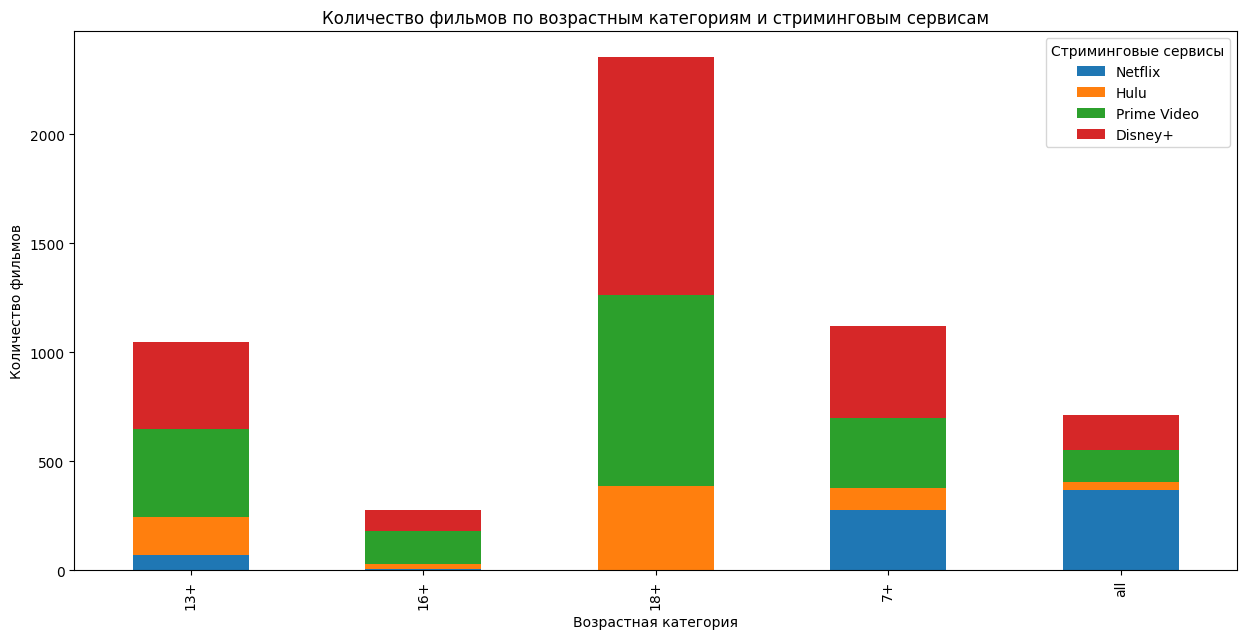

In [24]:
# визуализация

# создание диаграммы
pivot_table.plot(kind='bar', stacked=True, figsize=(15,7))

# метки осей и заголовок
plt.title('Количество фильмов по возрастным категориям и стриминговым сервисам')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество фильмов')
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'], title='Стриминговые сервисы')

plt.show